In [1]:
import sys
import numpy as np
import random
from scipy.stats import norm, uniform
from scipy.stats import entropy
from sklearn.metrics import mutual_info_score
import matplotlib.pyplot as plt
plt.style.use('bmh')
import seaborn as sns

###   Joint distribution $P(X,Y)$

In [2]:
pXY = np.array([[1/8, 1/16, 1/32, 1/32], # Y = axis 0, X = axis 1
                [1/16, 1/8, 1/32, 1/32],
                [1/16, 1/16, 1/16, 1/16],
                [1/4, 0, 0, 0]
               ])
print(pXY.shape)
pXY

(4, 4)


array([[0.125  , 0.0625 , 0.03125, 0.03125],
       [0.0625 , 0.125  , 0.03125, 0.03125],
       [0.0625 , 0.0625 , 0.0625 , 0.0625 ],
       [0.25   , 0.     , 0.     , 0.     ]])

### Marginals $P(X)$, $P(Y)$

In [3]:
pX = pXY.sum(0)
pY = pXY.sum(1)

print(f'P(X):{pX} \n\nP(Y):{pY}')

P(X):[0.5   0.25  0.125 0.125] 

P(Y):[0.25 0.25 0.25 0.25]


### Conditional $P(X|Y)$

In [4]:
pX_Y = (pXY.T / pY).T
pX_Y

array([[0.5  , 0.25 , 0.125, 0.125],
       [0.25 , 0.5  , 0.125, 0.125],
       [0.25 , 0.25 , 0.25 , 0.25 ],
       [1.   , 0.   , 0.   , 0.   ]])

### Entropy $H(X), H(X|Y)$ 

In [7]:
hX = entropy(pX, base=2)
print(f'H(X): {hX} bits | Description of X')

hY = entropy(pY, base=2)
print(f'\nH(Y): {hY} bits | Description of Y')

hX_Y = np.sum(entropy(pX_Y.T, base=2) * pY)
print(f'\nH(X|Y): {hX_Y} bits | Description of X after observing Y')

H(X): 1.75 bits | Description of X

H(Y): 2.0 bits | Description of Y

H(X|Y): 1.375 bits | Description of X after observing Y


In [8]:
np.log2(4)

2.0

### Mutual information $I(X:Y) = H(X) - H(X|Y)$ 

In [9]:
miXY = hX - hX_Y
print(f'I(X:Y): {miXY} bits | Reduction in the description of X')

I(X:Y): 0.375 bits | Reduction in the description of X


In [10]:
print(f'Reduction: {miXY / hX :.3f}%')

Reduction: 0.214%


# Empirical P(X,Y)

### Sampling from $P(X)$ and $P(Y)$ 

In [11]:
offset = 10

x_symbols = np.arange(len(pX))
y_symbols = np.arange(offset, offset+len(pY))

print(f'X symbols: {x_symbols} \nY symbols: {y_symbols}')

X symbols: [0 1 2 3] 
Y symbols: [10 11 12 13]


In [12]:
samples = 100

x = random.choices(x_symbols, weights=pX, k=samples) # SAMPLTE ACCORDING TO THE GIVEN JOINT DISTRIBUTION
y = random.choices(y_symbols, weights=pY, k=samples)

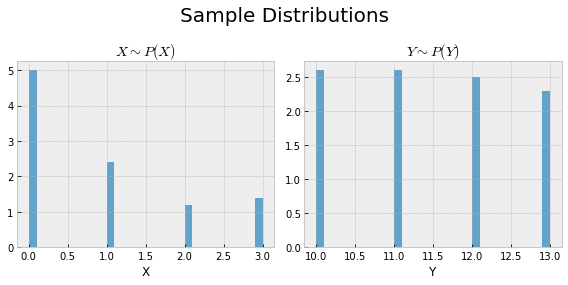

In [13]:
fig = plt.figure(figsize=(8,4))

ax = fig.add_subplot(121, title='$X \sim P(X)$')
ax.hist(x, 30, density=True, alpha=0.75)
ax.set_xlabel('X')

ax = fig.add_subplot(122, title='$Y \sim P(Y)$')
ax.hist(y, 30, density=True, alpha=0.75)
ax.set_xlabel('Y')

plt.suptitle('Sample Distributions', fontsize=20)
plt.tight_layout()
plt.show()

### Noise variables

In [14]:
m = 0
s = 1
n_noise = norm(m,s) # Normal noise

a, b = -0.5, 0.5
u_noise = uniform(a,b) # Uniform noise

In [15]:
x_norm = x + n_noise.rvs(samples)
x_unif = x + u_noise.rvs(samples)

y_norm = y + n_noise.rvs(samples)
y_unif = y + u_noise.rvs(samples)

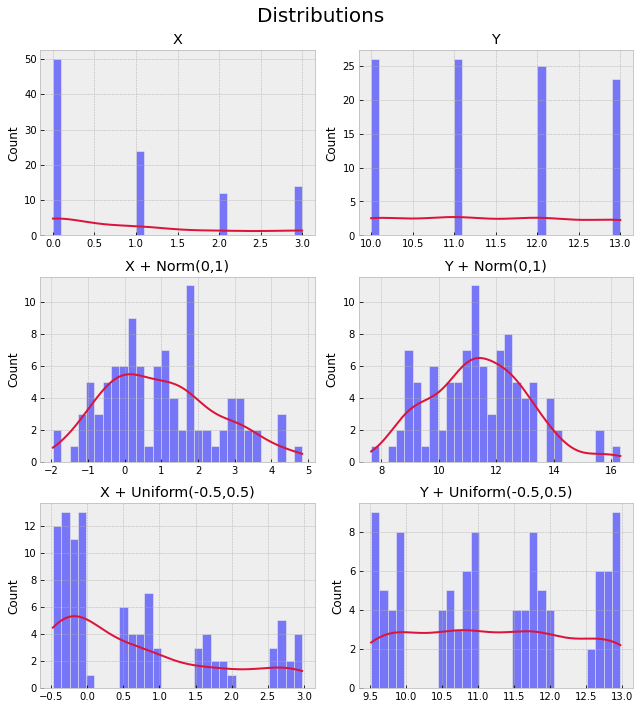

In [16]:
fig, axes = plt.subplots(3,2, figsize=(9,10))
bins = 30
line_color = 'crimson'

ax=axes[0,0]
sns.histplot(x, bins=bins, kde=True, ax=ax)
ax.lines[0].set_color(line_color)
ax.set_title('X')

ax=axes[0,1]
sns.histplot(y, bins=bins, kde=True, ax=ax)
ax.lines[0].set_color(line_color)
ax.set_title('Y')

ax=axes[1,0]
sns.histplot(x_norm, bins=bins, kde=True, ax=ax)
ax.lines[0].set_color(line_color)
ax.set_title(f'X + Norm({m},{s})')

ax=axes[1,1]
sns.histplot(y_norm, bins=bins, kde=True, ax=ax)
ax.lines[0].set_color(line_color)
ax.set_title(f'Y + Norm({m},{s})')

ax=axes[2,0]
sns.histplot(x_unif, bins=bins, kde=True, ax=ax)
ax.lines[0].set_color(line_color)
ax.set_title(f'X + Uniform({a},{b})')

ax=axes[2,1]
sns.histplot(y_unif, bins=bins, kde=True, ax=ax)
ax.lines[0].set_color(line_color)
ax.set_title(f'Y + Uniform({a},{b})')


plt.suptitle('Distributions', fontsize=20)
plt.tight_layout()
plt.show()

In [17]:
pxy, xbin, ybin = np.histogram2d(x_unif, y_unif, bins=10)
print(pxy.shape)

(10, 10)


<ipython-input-18-d25418c3f964>:2: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.pcolormesh(X, Y, pxy)


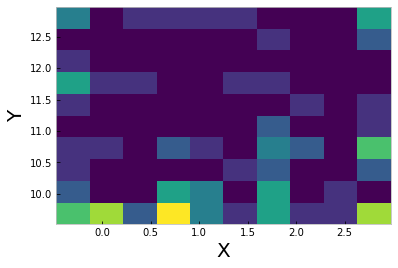

In [18]:
X, Y = np.meshgrid(xbin, ybin)
plt.pcolormesh(X, Y, pxy)
plt.xlabel('X', fontsize=20)
plt.ylabel('Y', fontsize=20)
plt.show()

In [22]:
print(f'Outcomes: {pxy.sum()}')
pxy

Outcomes: 100.0


array([[5., 6., 2., 7., 3., 1., 4., 1., 1., 6.],
       [2., 0., 0., 4., 3., 0., 4., 0., 1., 0.],
       [1., 0., 0., 0., 0., 1., 2., 0., 0., 2.],
       [1., 1., 0., 2., 1., 0., 3., 2., 0., 5.],
       [0., 0., 0., 0., 0., 0., 2., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [4., 1., 1., 0., 0., 1., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 2.],
       [3., 0., 1., 1., 1., 1., 0., 0., 0., 4.]])

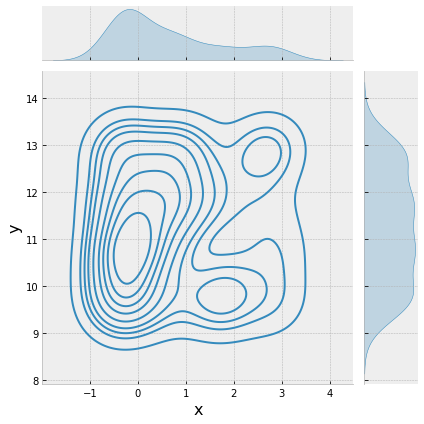

In [23]:
g = sns.jointplot(x=x_unif, y=y_unif, kind='kde', marginal_kws=dict(fill=True), ax=ax)
g.set_axis_labels('x', 'y', fontsize=16)
#g.ax_joint.set_xlabel('new x label', fontweight='bold')
g.figure.tight_layout() 

<ipython-input-58-a9d41dfc0df6>:15: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  ax.pcolormesh(X, Y, pxy)


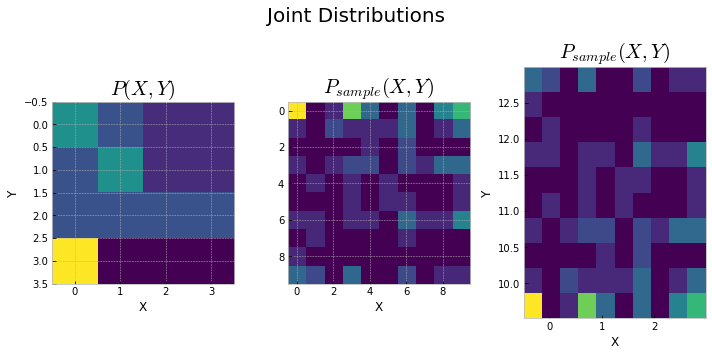

In [58]:
fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(131)
ax.imshow(pXY)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('$P(X,Y)$', size=20)

ax = fig.add_subplot(132)
ax.imshow(pxy)
ax.set_xlabel('X')
ax.set_title('$P_{sample}(X,Y)$', size=20)

ax = fig.add_subplot(133)
ax.pcolormesh(X, Y, pxy)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('$P_{sample}(X,Y)$', size=20)

plt.suptitle('Joint Distributions', fontsize=20)
plt.tight_layout()
plt.show()

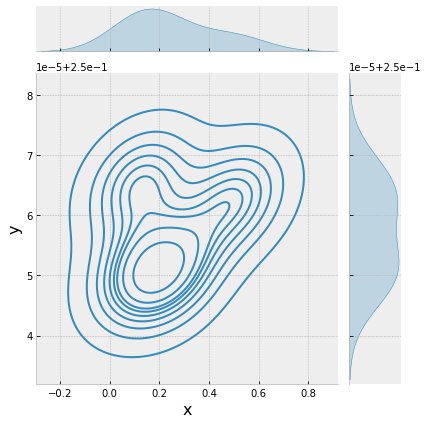

In [59]:
g = sns.jointplot(x=pX, y=pY+uniform(0,0.0001).rvs(4), kind='kde', marginal_kws=dict(fill=True), ax=ax)
g.set_axis_labels('x', 'y', fontsize=16)
#g.ax_joint.set_xlabel('new x label', fontweight='bold')
g.figure.tight_layout() 

## MEASURES

In [60]:
np.corrcoef(x,y)[0][1] # SYMBOL CORRELATION

-0.06977154046926316

In [63]:
np.corrcoef(x_unif,y_unif)[0][1] # SYMBOL + UNIFORM CORRELATION

-0.047941029193612206

In [64]:
np.corrcoef(x_norm,y_norm)[0][1] # SYMBOL + NORMAL CORRELATION

-0.053092034125302515

In [65]:
mi = mutual_info_score(None, None, contingency=pxy)
print(f'I(X:Y): {mi:.4f} nits')

I(X:Y): 0.3607 nits


In [67]:
mib = np.log2(np.e) * mi
print(f'I(X:Y): {mib:.4f} bits')

I(X:Y): 0.5203 bits


In [69]:
table = pxy/pxy.sum()
table

array([[0.09, 0.  , 0.01, 0.07, 0.03, 0.  , 0.03, 0.  , 0.04, 0.06],
       [0.01, 0.  , 0.02, 0.01, 0.01, 0.01, 0.03, 0.  , 0.01, 0.03],
       [0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.  , 0.  ],
       [0.01, 0.  , 0.01, 0.02, 0.02, 0.  , 0.02, 0.01, 0.03, 0.03],
       [0.  , 0.01, 0.  , 0.01, 0.  , 0.01, 0.  , 0.  , 0.  , 0.01],
       [0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.01, 0.  , 0.  , 0.01],
       [0.01, 0.01, 0.  , 0.01, 0.01, 0.  , 0.03, 0.01, 0.01, 0.04],
       [0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.03, 0.02, 0.  , 0.03, 0.  , 0.  , 0.02, 0.  , 0.01, 0.01]])

In [70]:
pX = table.sum(0)
pY = table.sum(1)

print(f'P(X):{pX} \n\nP(Y):{pY}')

P(X):[0.16 0.05 0.04 0.16 0.08 0.03 0.17 0.02 0.1  0.19] 

P(Y):[0.33 0.13 0.03 0.15 0.04 0.04 0.13 0.02 0.01 0.12]


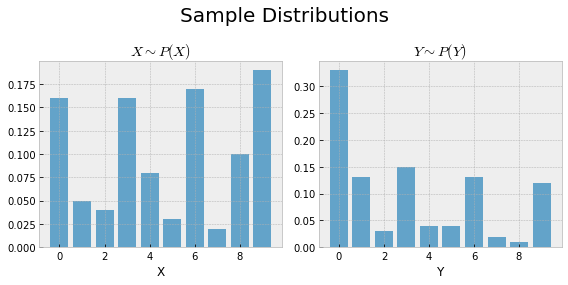

In [78]:
fig = plt.figure(figsize=(8,4))

ax = fig.add_subplot(121, title='$X \sim P(X)$')
ax.bar(np.arange(10), pX, alpha=0.75)
ax.set_xlabel('X')

ax = fig.add_subplot(122, title='$Y \sim P(Y)$')
ax.bar(np.arange(10), pY, alpha=0.75)
ax.set_xlabel('Y')

plt.suptitle('Sample Distributions', fontsize=20)
plt.tight_layout()
plt.show()

In [79]:
pX = table.sum(1)
pY = table.sum(0)

print(f'P(X):{pX} \n\nP(Y):{pY}')

P(X):[0.33 0.13 0.03 0.15 0.04 0.04 0.13 0.02 0.01 0.12] 

P(Y):[0.16 0.05 0.04 0.16 0.08 0.03 0.17 0.02 0.1  0.19]


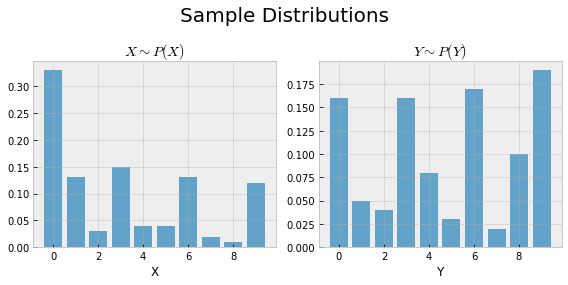

In [80]:
fig = plt.figure(figsize=(8,4))

ax = fig.add_subplot(121, title='$X \sim P(X)$')
ax.bar(np.arange(10), pX, alpha=0.75)
ax.set_xlabel('X')

ax = fig.add_subplot(122, title='$Y \sim P(Y)$')
ax.bar(np.arange(10), pY, alpha=0.75)
ax.set_xlabel('Y')

plt.suptitle('Sample Distributions', fontsize=20)
plt.tight_layout()
plt.show()